In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pandas as pd

In [2]:
from problem import Wave_1d
from model import PDE_basis, TrainLS
from my_utils import plot_2d_tri, plot_domain_2d

***************************************************
Wave_1d (case=None):
	x_pde:   	(5000, 2)
	x_bd:    	(996, 2)
	x_ic:    	(502, 2)
	x_test:    	(7326, 2)
***************************************************
(502, 1)
(502, 1)
pde rmse: 5.383018914152043e-17


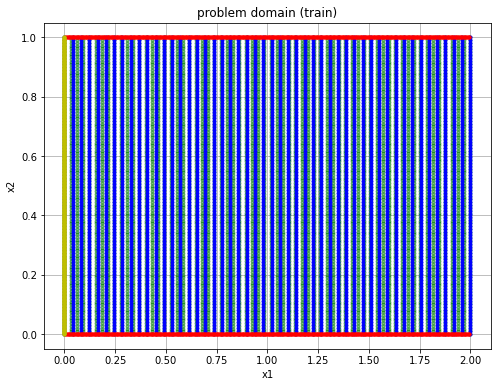

In [3]:
data = np.load('data/data.npz',allow_pickle=True)
my_prob = Wave_1d(data=data)
print(my_prob)


print(my_prob.target_ic['u'].shape)
print(my_prob.target_ic['u0'].shape)


x,u = my_prob.check_solution()
plot_2d_tri(x[:,0], x[:,1], u[:,0], equal_ratio=False)


plot_domain_2d(x_pde=my_prob.x_pde, x_bd=my_prob.x_bd, x_test=my_prob.x_test, x_ic=my_prob.x_ic)


In [5]:
basis_num_vec = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
shape_vec = [1, 1, 1, 1.5, 1.5,  1.5, 2, 2, 2, 2]
print(len(shape_vec))
print(len(basis_num_vec))
# weight = {'pde':1, 'bd_u':1,'bd_u0':1}

10
10


In [6]:
temp_mse = []
for i in range(10):
    basis_num = basis_num_vec[i]
    basis = PDE_basis(x_dim=2, basis_num=basis_num)
    basis.init_pde_basis(shape=shape_vec[i], radius=1.5)
    train_ls = TrainLS(problem=my_prob, basis=basis)

    coef_sol, info1 = train_ls.ls_pde(current_ceof=None, weights=None, ls_mse=True, item_mse=False)

    mse_test, info2 = train_ls.get_mse_test(coef_sol=coef_sol)
    print(i,'Test MSE:', mse_test)
    temp_mse.append(mse_test)
mse_pde = np.array(temp_mse)

0 Test MSE: 0.0002414488759599427
1 Test MSE: 2.1488629681169702e-09
2 Test MSE: 6.166104085327022e-13
3 Test MSE: 9.857456834267556e-14
4 Test MSE: 4.404223712360923e-16
5 Test MSE: 7.40372129796516e-17
6 Test MSE: 6.218368394804168e-17
7 Test MSE: 4.8357193835238855e-18
8 Test MSE: 1.0147209168395387e-18
9 Test MSE: 2.9996009546438272e-18


In [7]:
# basis.init_dnn(init_type='default')


temp_mse = []
for i in range(10):
    basis_num = basis_num_vec[i]
    basis = PDE_basis(x_dim=2, basis_num=basis_num)
    basis.init_dnn(init_type='default')
    train_ls = TrainLS(problem=my_prob, basis=basis)

    coef_sol, info1 = train_ls.ls_pde(current_ceof=None,weights=None,ls_mse=True,item_mse=False)

    # mse_test, info2 = train_ls.get_mse_data(x_in=my_prob.x_test, y_true=my_prob.target_test['u'],
    #                                         coef=coef_sol['u'], basis=basis)
    mse_test, info2 = train_ls.get_mse_test(coef_sol=coef_sol)
    print(i,'Test MSE:', mse_test)
    temp_mse.append(mse_test)


#
mse_dnn_default = np.array(temp_mse)

0 Test MSE: 0.00013620350265629207
1 Test MSE: 1.5695808823363572e-09
2 Test MSE: 8.471080718045629e-11
3 Test MSE: 3.5200303808584215e-11
4 Test MSE: 4.016974499025643e-11
5 Test MSE: 1.4094877357010345e-11
6 Test MSE: 9.717100503039769e-12
7 Test MSE: 1.0914263638340957e-11
8 Test MSE: 1.0354194069688383e-11
9 Test MSE: 5.5233811880916e-12


In [8]:
df = pd.DataFrame({'basis_num': basis_num_vec,
                   'mse_dnn_default': mse_dnn_default,
                   'mse_pde_basis': mse_pde})
df.to_csv(f'ls.csv',header=True, index=False, encoding='utf-8')


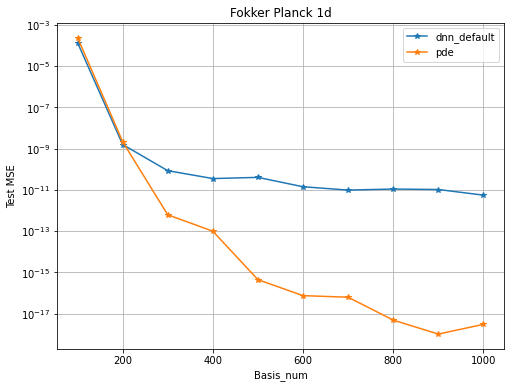

In [9]:
plt.figure(figsize=(8,6))
plt.plot(basis_num_vec, mse_dnn_default,'*-' ,label='dnn_default')
plt.plot(basis_num_vec, mse_pde,'*-', label='pde')
plt.yscale('log')
plt.legend()
plt.title('Fokker Planck 1d')
plt.grid(which='both')
plt.xlabel('Basis_num')
plt.ylabel('Test MSE')
# plt.savefig('fp_1d.png',dpi=200)
plt.show()